In [1]:
import pandas as pd
import numpy as np
import keras

Using TensorFlow backend.
/home/antonis/anaconda2/envs/kaggle/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.utils.np_utils import to_categorical
from keras.layers import *

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5418413695538988779
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 78249984
locality {
  bus_id: 1
}
incarnation: 16502334995401453779
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
# from keras import backend as K
# K.tensorflow_backend.get_value()

In [5]:
#to save models
from datetime import datetime
import pickle
import glob

In [6]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import cm
from skimage.io import imread
from sklearn.model_selection import train_test_split
import cv2

In [7]:
#Read training data
df = pd.read_csv('train_onelabel.csv',index_col='image')

In [8]:
#create useful dicts

# mapping images-class IDs
get_class_of = df['class'].copy().to_dict()
get_images_of = df.copy().groupby('class').apply(lambda x: x.values.tolist()).to_dict()

# TODO correct get_images_of

In [9]:
#Read label mapping
df_label_map = pd.read_csv('label_map.txt',header=None,names=['name','id'],sep=' ')

# mapping class IDs-class names
get_name_of_class = df_label_map['name'].to_dict()
'''
    Usage:
    get_name_of_class[9]
    >> 'ctenophore_cydippid_tentacles'
'''

get_class_name_of = {v: k for k, v in get_name_of_class.items()}
'''
    Usage:
    get_class_name_of['ctenophore_cydippid_tentacles']
    >> 9
'''

"\n    Usage:\n    get_class_name_of['ctenophore_cydippid_tentacles']\n    >> 9\n"

# load data

In [10]:
training_paths = glob.glob('competition_data/train_images/*')
test_paths = glob.glob('competition_data/test_images/*')

In [11]:
training_paths[3]

'competition_data/train_images/101565.jpg'

## Class Imbalance

In [12]:
class_counts = df['class'].value_counts()

In [13]:
class_counts.sum()

24204

In [14]:
class_weights = class_counts/class_counts.sum()

In [15]:
class_weights = class_weights.to_dict()

## Define image input size

In [16]:
input_size = (64,64)

In [17]:
#load X (images - train & test set)
images = (load_img(p, target_size=input_size,grayscale=True) for p in training_paths)
X = np.array([img_to_array(im) for im in images])
del images

In [18]:
print(X.shape)

(24204, 64, 64, 1)


In [19]:
#load X_ ()
images = (load_img(p, target_size=input_size,grayscale=True) for p in test_paths)
X_predict = np.array([img_to_array(im) for im in images])
del images

In [20]:
from utils import reshape_to_view_img

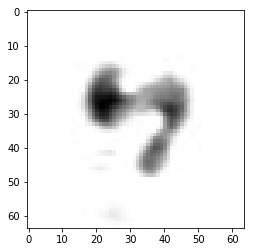

In [21]:
plt.imshow(reshape_to_view_img(X[3]),cmap='gray')

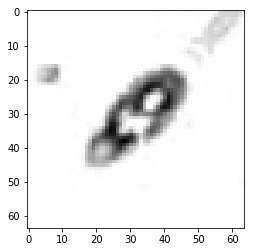

In [22]:
plt.imshow(reshape_to_view_img(X_predict[3]),cmap='gray')

In [23]:
#load Y (labels)
y = list(map(lambda p: get_class_of[p.split('/')[-1]] , training_paths))

In [24]:
y[:10]

[53, 12, 115, 34, 101, 49, 12, 78, 113, 0]

### convert black background to white background


In [25]:
#convert black to white (for zero padding)
def inverse_grayscale(pixel_value):
    return (255.-pixel_value)
def inverse_scale_center(pixel_value):
    return (((255.-pixel_value)/255)-0.5)
v_inverse_grayscale = np.vectorize(inverse_grayscale)
v_inverse_scale_center = np.vectorize(inverse_scale_center)

X_transf = v_inverse_scale_center(X)

In [26]:
# X (train&validation)
print(X.shape)
print(X_transf.shape)
print(y[:10])

(24204, 64, 64, 1)
(24204, 64, 64, 1)
[53, 12, 115, 34, 101, 49, 12, 78, 113, 0]


In [27]:
X_predict_transf = v_inverse_grayscale(X_predict)

In [28]:
# X (train&validation)
print(X_predict.shape)
print(X_predict_transf.shape)
print("What? they didn\'t give us the labels? \nWHY!???!")

(6132, 64, 64, 1)
(6132, 64, 64, 1)
What? they didn't give us the labels? 
WHY!???!


In [29]:
# a= test_datagen.flow(X_predict)

In [30]:
batch_size=64

In [31]:
# for x in range(batch_size):
#     img = a.next()
#     plt.imshow(reshape_to_view_img(img),cmap='gray')
#     plt.show()

In [32]:
# (list(test_datagen.flow(X_predict,
#                              shuffle=False, )) for jdsdj in [1])

### Train test split

In [33]:
# TODO roll back to X_transf instead of X
X_train, X_test, y_train, y_test = train_test_split(
    X_transf,to_categorical(y), 
    test_size=0.2, random_state=41,
    stratify=to_categorical(y)
)

In [34]:
print('X_train.shape:',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape: (19363, 64, 64, 1)
y_train.shape (19363, 121)


In [35]:
# pd.DataFrame(y_train).value_counts().hist()

In [36]:
# pd.DataFrame(y_test).value_counts().hist()

# Image Augmentation

In [37]:
from keras.preprocessing.image import ImageDataGenerator

# TODO
## Fix ImageDataGenerator for prediction set

In [38]:
X_train[22][22]

array([[-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.49215686],
       [-0.49215686],
       [-0.49607843],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.49607843],
       [-0.49607843],
       [-0.5       ],
       [-0.49215686],
       [-0.48823529],
       [-0.49607843],
       [-0.49607843],
       [-0.46078431],
       [-0.25294118],
       [-0.06078431],
       [ 0.08823529],
       [-0.19803922],
       [-0.39019608],
       [-0.48823529],
       [-0.5       ],
       [-0.5       ],
       [-0.49607843],
       [-0.25294118],
       [-0.02941176],
       [-0.0254902 ],
       [-0.23333333],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0

In [39]:
train_datagen = ImageDataGenerator(rotation_range=90,
                                   #rescale=1./255.,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    samplewise_std_normalization=False,
                                    samplewise_center=False,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range = (20/360)*(2*np.pi)
                                )

test_datagen = ImageDataGenerator(#rescale = 1./255,
#                                  samplewise_std_normalization=True,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    samplewise_std_normalization=False,
                                    samplewise_center=False,
                                 )

train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [40]:
#export model history
with open('test_datagen_trained' + '.pickle', 'wb') as file_pi:
    pickle.dump(test_datagen, file_pi)

# Training part

In [41]:
nr_of_classes = len(np.unique(y))

In [42]:
input_size

(64, 64)

In [43]:
reg_lambda = 0.01/255
dropout_value = 0.25

In [44]:
model = keras.Sequential()

model.add(InputLayer(input_shape=input_size + (1,)))

########################

model.add(Conv2D(12, kernel_size = (3,3),
                 padding='same', 
                 kernel_regularizer=regularizers.l2(reg_lambda),
                 activation='relu')
         )
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(dropout_value))
########################
# 32 32 12
# depth = 12
########################

model.add(Conv2D(24, kernel_size = (3, 3), #activation='relu',
                padding='same',
                kernel_regularizer=regularizers.l2(reg_lambda),
                activation='relu',)
         )
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(dropout_value))
########################
# batch_size 16 16 24
########################

model.add(Conv2D(48, kernel_size = (3, 3), #activation='relu',
                padding='same',
                kernel_regularizer=regularizers.l2(reg_lambda),
                activation='relu',)
         )
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(dropout_value))

########################
# batch_size 8 8 48
########################

model.add(Conv2D(96, kernel_size = (3, 3), #activation='relu',
                padding='same',
                kernel_regularizer=regularizers.l2(reg_lambda),
                activation='relu',)
         )

# model.add(Conv2D(48, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(dropout_value))

########################
# batch_size 4 4 96
########################

model.add(Flatten())
# model.add(Dropout(dropout_value))

########################
# 4*4* 48 = 16 * 48 = 768
# (batch_size, 2048)
########################

# model.add(Dense(128, activation='relu'))

########################
model.add(Dense(256,
                activation='relu',
                kernel_regularizer=regularizers.l2(reg_lambda)
               )
         )

model.add(Dropout(2*dropout_value))
########################
model.add(Dense(256,
                activation='relu',
                kernel_regularizer=regularizers.l2(reg_lambda)
               )
         )
# model.add(Dropout(dropout_value))

########################

model.add(Dense(121, activation='softmax'))

In [45]:
model.compile(optimizer=keras.optimizers.Adam()
              ,loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 12)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 24)        2616      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 48)        10416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 48)          0         
__________

In [47]:
# tf.exponential decay

# global_step = tf.Variable(0, trainable=False)
# starter_learning_rate = 0.1
# learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
#                                            100000, 0.96, staircase=True)
# # Passing global_step to minimize() will increment it at each step.
# learning_step = (
#     tf.train.GradientDescentOptimizer(learning_rate)
#     .minimize(...my loss..., global_step=global_step)

In [48]:
batch_size = 64

In [49]:
# test_set = test_datagen.flow(X_test,
#                              y=y_test,
#                              shuffle=False,
#                             batch_size = batch_size,
#                             )

In [50]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,History

In [51]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-20,
                             verbose=1)

In [52]:
early_stop = EarlyStopping(patience=25,verbose=1)

In [55]:
save_history = History()

In [56]:
# tf.train.exponential_decay(learning_rate=.1
#                            ,global_step=302
#                            ,decay_steps=302
#                            ,decay_rate=0.96
#                            ,staircase=True
#                           )

In [57]:
mod_history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    #define epochs
    epochs=200,
    initial_epoch=0,
    
    verbose=1, 
    steps_per_epoch=(len(X_train))/batch_size,
    
    #Validation
    validation_data=test_datagen.flow(X_test,y_test, batch_size=batch_size),
    validation_steps = (len(X_test)/batch_size), #number of samples of your validation dataset divided by the batch size.
    
    #Class imbalance
    #class_weight = class_weights,
    
    #Callbacks
    #callbacks=[early_stop,save_history],
)


Epoch 1/200


ResourceExhaustedError: OOM when allocating tensor with shape[3,3,48,96]
	 [[Node: conv2d_4/Square = Square[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_4/kernel/read)]]
	 [[Node: metrics/acc/Mean/_149 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1205_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv2d_4/Square', defined at:
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-8c35f0e82003>", line 45, in <module>
    activation='relu',)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/models.py", line 475, in add
    output_tensor = layer(self.outputs[0])
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/engine/topology.py", line 576, in __call__
    self.build(input_shapes[0])
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/layers/convolutional.py", line 134, in build
    constraint=self.kernel_constraint)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/engine/topology.py", line 402, in add_weight
    self.add_loss(regularizer(weight))
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/regularizers.py", line 37, in __call__
    regularization += K.sum(self.l2 * K.square(x))
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 1408, in square
    return tf.square(x)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 449, in square
    return gen_math_ops.square(x, name=name)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4567, in square
    "Square", x=x, name=name)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,48,96]
	 [[Node: conv2d_4/Square = Square[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_4/kernel/read)]]
	 [[Node: metrics/acc/Mean/_149 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1205_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
# history = model.fit(X_train, y_train,
#                     batch_size=64, epochs=30, 
#                     verbose=1, 
#                     validation_data=[X_test, y_test])

# Learning curves

## CAUTION:
# If run, following cell will delete previous values :

In [69]:
# #create a new learning curve
# learn_curve = pd.DataFrame(columns=['train', 'test', 'train_rolling', 'test_rolling'])

In [70]:
# append new values to a learning curve (extend epochs to see progress)
learn_curve_new = pd.DataFrame()
learn_curve_new['train'] = mod_history.history['acc']
learn_curve_new['test'] = mod_history.history['val_acc']
learn_curve_new['train_rolling'] = pd.rolling_mean(learn_curve_new.train,window=5)
learn_curve_new['test_rolling'] = pd.rolling_mean(learn_curve_new.test,window=20)
#append to previous df
learn_curve = learn_curve.append(learn_curve_new,ignore_index=True)

/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
/home/antonis/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


In [71]:

# learn_curve['train'] = mod_history.history['acc']
# learn_curve['test'] = mod_history.history['val_acc']
# learn_curve['train_rolling'] = pd.rolling_mean(learn_curve.train,window=5)
# learn_curve['test_rolling'] = pd.rolling_mean(learn_curve.test,window=20)

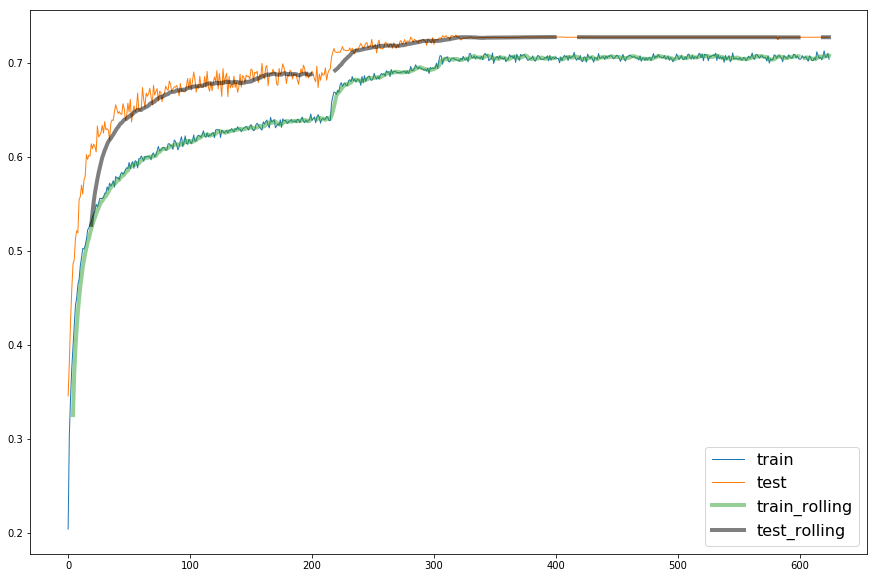

In [72]:
# Plot the learning curve
fig = plt.figure(figsize=(15, 10))
plt.plot(learn_curve['train'], lw=1, label='train')
plt.plot(learn_curve['test'], lw=1, label='test')
plt.plot(learn_curve['train_rolling'], lw=4, label='train_rolling',alpha=.5)
plt.plot(learn_curve['test_rolling'], lw=4, label='test_rolling',alpha=.5,color='k')
plt.legend(loc='best', fontsize=16)

### Model Summary

In [73]:
#review model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 12)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 24)        2616      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 48)        10416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 48)          0         
__________

In [74]:
# from keras.utils import plot_model
# plot_model(history.model, to_file='model.png')

# Export model (history, summary and learning curves)

In [75]:
# add any notes here
notes='double_kernel_size_termatismeno'

In [76]:
#set filename
time= datetime.now().strftime('%m-%d %H.%M, ')
errors = 'train_err=%.2f, test_err=%.2f'%(mod_history.history['acc'][-1],mod_history.history['val_acc'][-1])
ffilename = 'trainHistory/'+time+errors+notes

# TODO history.history only contains errors

In [77]:
#export model history
with open(ffilename + '.pickle', 'wb') as file_pi:
    pickle.dump(mod_history.history, file_pi)

In [78]:
#export model
model.save(ffilename+'.h5')

In [79]:
# save model summary (layer architecture etc)
with open(ffilename + '_summary.txt','w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))

In [80]:
# save learning curve image
fig.savefig(ffilename+'_learning_curve.png')

# Evaluate model on validation set

In [66]:
# model.evaluate(X_predict_transf, y, verbose=1)

# Predict values for test (Kaggle) dataset

## I will load a new model from disk here!

## Make sure X_transf and X_predict_transf  and have undergone same transformations!

## Make sure batch size is same as above

In [ ]:
#batch_size

In [35]:
model_from_disk = keras.models.load_model('trainHistory/12-01 15.02, train_err=0.71, test_err=0.59small_basic_net_i_30.h5')

In [ ]:
model_from_disk.predict(X_predict_transf,batch_size=batch_size,verbose=1)

In [37]:
X_predict_transf

array([[[[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  1.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        ..., 
        [[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]]],


       [[[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ..., 
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.]

In [ ]:
model